In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data:

In [60]:
#read in the data
df = pd.read_csv('data/cumulative_clean.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              4647 non-null   int64  
 1   kepoi_name         4647 non-null   object 
 2   kepler_name        2724 non-null   object 
 3   koi_disposition    4647 non-null   int64  
 4   koi_pdisposition   4647 non-null   int64  
 5   koi_score          4082 non-null   float64
 6   koi_period         4647 non-null   float64
 7   koi_time0bk        4647 non-null   float64
 8   koi_impact         4647 non-null   float64
 9   koi_duration       4647 non-null   float64
 10  koi_depth          4647 non-null   float64
 11  koi_prad           4647 non-null   float64
 12  koi_teq            4647 non-null   float64
 13  koi_insol          4647 non-null   float64
 14  koi_model_snr      4647 non-null   float64
 15  koi_tce_plnt_num   4554 non-null   float64
 16  koi_tce_delivname  4554 

### Select Features:

In [61]:
#Removing the unnecessary features
#drop columns with greater than 500 null values
missing_values_count = df.isnull().sum()
columns_to_keep = missing_values_count[missing_values_count <= 500].index
df_filtered = df[columns_to_keep]
#remove kepid, kepoi_name, koi_pdisposition and koi_tce_delivname and other columns that are not useful
df_filtered = df_filtered.drop(['kepid','kepoi_name','koi_pdisposition','koi_tce_delivname','koi_tce_plnt_num','ra','dec','koi_kepmag'], axis=1)
df_filtered

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
0,2,9.488036,170.538750,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927
1,2,54.418383,162.513840,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927
2,1,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868
3,2,2.525592,171.595550,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046
4,2,11.094321,171.201160,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,1,7.268182,135.934800,0.780,4.9850,46.7,1.66,1444.0,1027.95,9.7,6297.0,3.890,2.219
4643,1,376.379890,486.602200,0.305,13.9900,1140.0,3.26,265.0,1.16,13.3,6231.0,4.488,0.955
4644,1,367.947848,416.209980,0.902,4.2490,1301.0,3.72,228.0,0.64,10.7,5570.0,4.561,0.855
4645,1,1.739849,133.001270,0.043,3.1140,48.5,0.72,1608.0,1585.81,10.6,6119.0,4.444,1.031


In [62]:
# Dealing with null data fields with mean values
df_filtered.fillna(df_filtered.mean(), inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  4647 non-null   int64  
 1   koi_period       4647 non-null   float64
 2   koi_time0bk      4647 non-null   float64
 3   koi_impact       4647 non-null   float64
 4   koi_duration     4647 non-null   float64
 5   koi_depth        4647 non-null   float64
 6   koi_prad         4647 non-null   float64
 7   koi_teq          4647 non-null   float64
 8   koi_insol        4647 non-null   float64
 9   koi_model_snr    4647 non-null   float64
 10  koi_steff        4647 non-null   float64
 11  koi_slogg        4647 non-null   float64
 12  koi_srad         4647 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 472.1 KB


### Correlations between columns

,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
koi_disposition,1.000000,-0.035227,-0.179601,-0.056364,-0.169506,-0.036545,-0.031476,0.005072,-0.062616,0.104935,-0.151519,0.161269,-0.077780
koi_period,-0.035227,1.000000,0.091585,0.003053,0.049802,0.002349,0.001297,-0.052777,-0.003787,-0.004182,-0.018205,0.002319,0.001098
koi_time0bk,-0.179601,0.091585,1.000000,0.026106,0.338955,0.042500,0.020227,-0.359984,-0.036780,-0.000417,0.036681,-0.041512,0.028140
koi_impact,-0.056364,0.003053,0.026106,1.000000,0.000966,0.005324,0.670301,-0.010682,-0.000055,-0.011063,0.011015,-0.065870,0.023985
koi_duration,-0.169506,0.049802,0.338955,0.000966,1.000000,0.020849,-0.001511,-0.322611,-0.045445,0.014360,0.234014,-0.229077,0.062435
koi_depth,-0.036545,0.002349,0.042500,0.005324,0.020849,1.000000,0.001479,-0.035296,-0.003003,0.318256,-0.042606,0.047898,-0.011360
koi_prad,-0.031476,0.001297,0.020227,0.670301,-0.001511,0.001479,1.000000,-0.002206,-0.000638,-0.005352,-0.005914,-0.092035,0.047512
koi_teq,0.005072,-0.052777,-0.359984,-0.010682,-0.322611,-0.035296,-0.002206,1.000000,0.466256,0.057511,0.249938,-0.361855,0.170166
koi_insol,-0.062616,-0.003787,-0.036780,-0.000055,-0.045445,-0.003003,-0.000638,0.466256,1.000000,0.001757,0.063774,-0.215030,0.104015
koi_model_snr,0.104935,-0.004182,-0.000417,-0.011063,0.014360,0.318256,-0.005352,0.057511,0.001757,1.000000,0.007107,0.008391,-0.007918


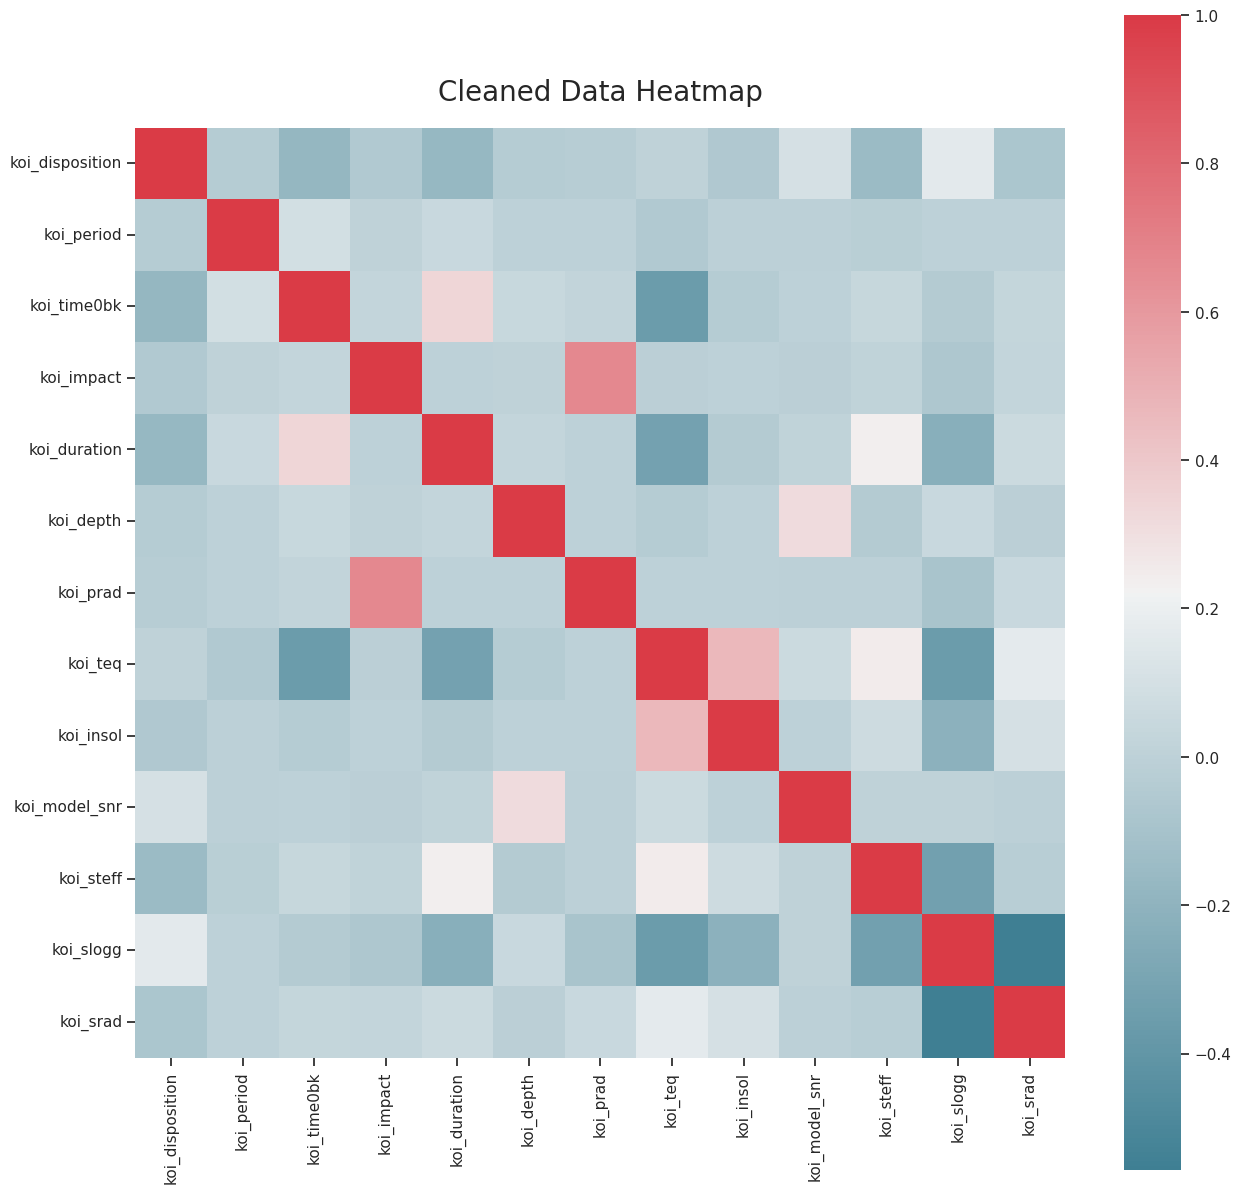

In [63]:
# Building a correlation matrix
corr = df_filtered.corr()
display(corr)

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Cleaned Data Heatmap', fontsize=20, pad=20)
plt.show()

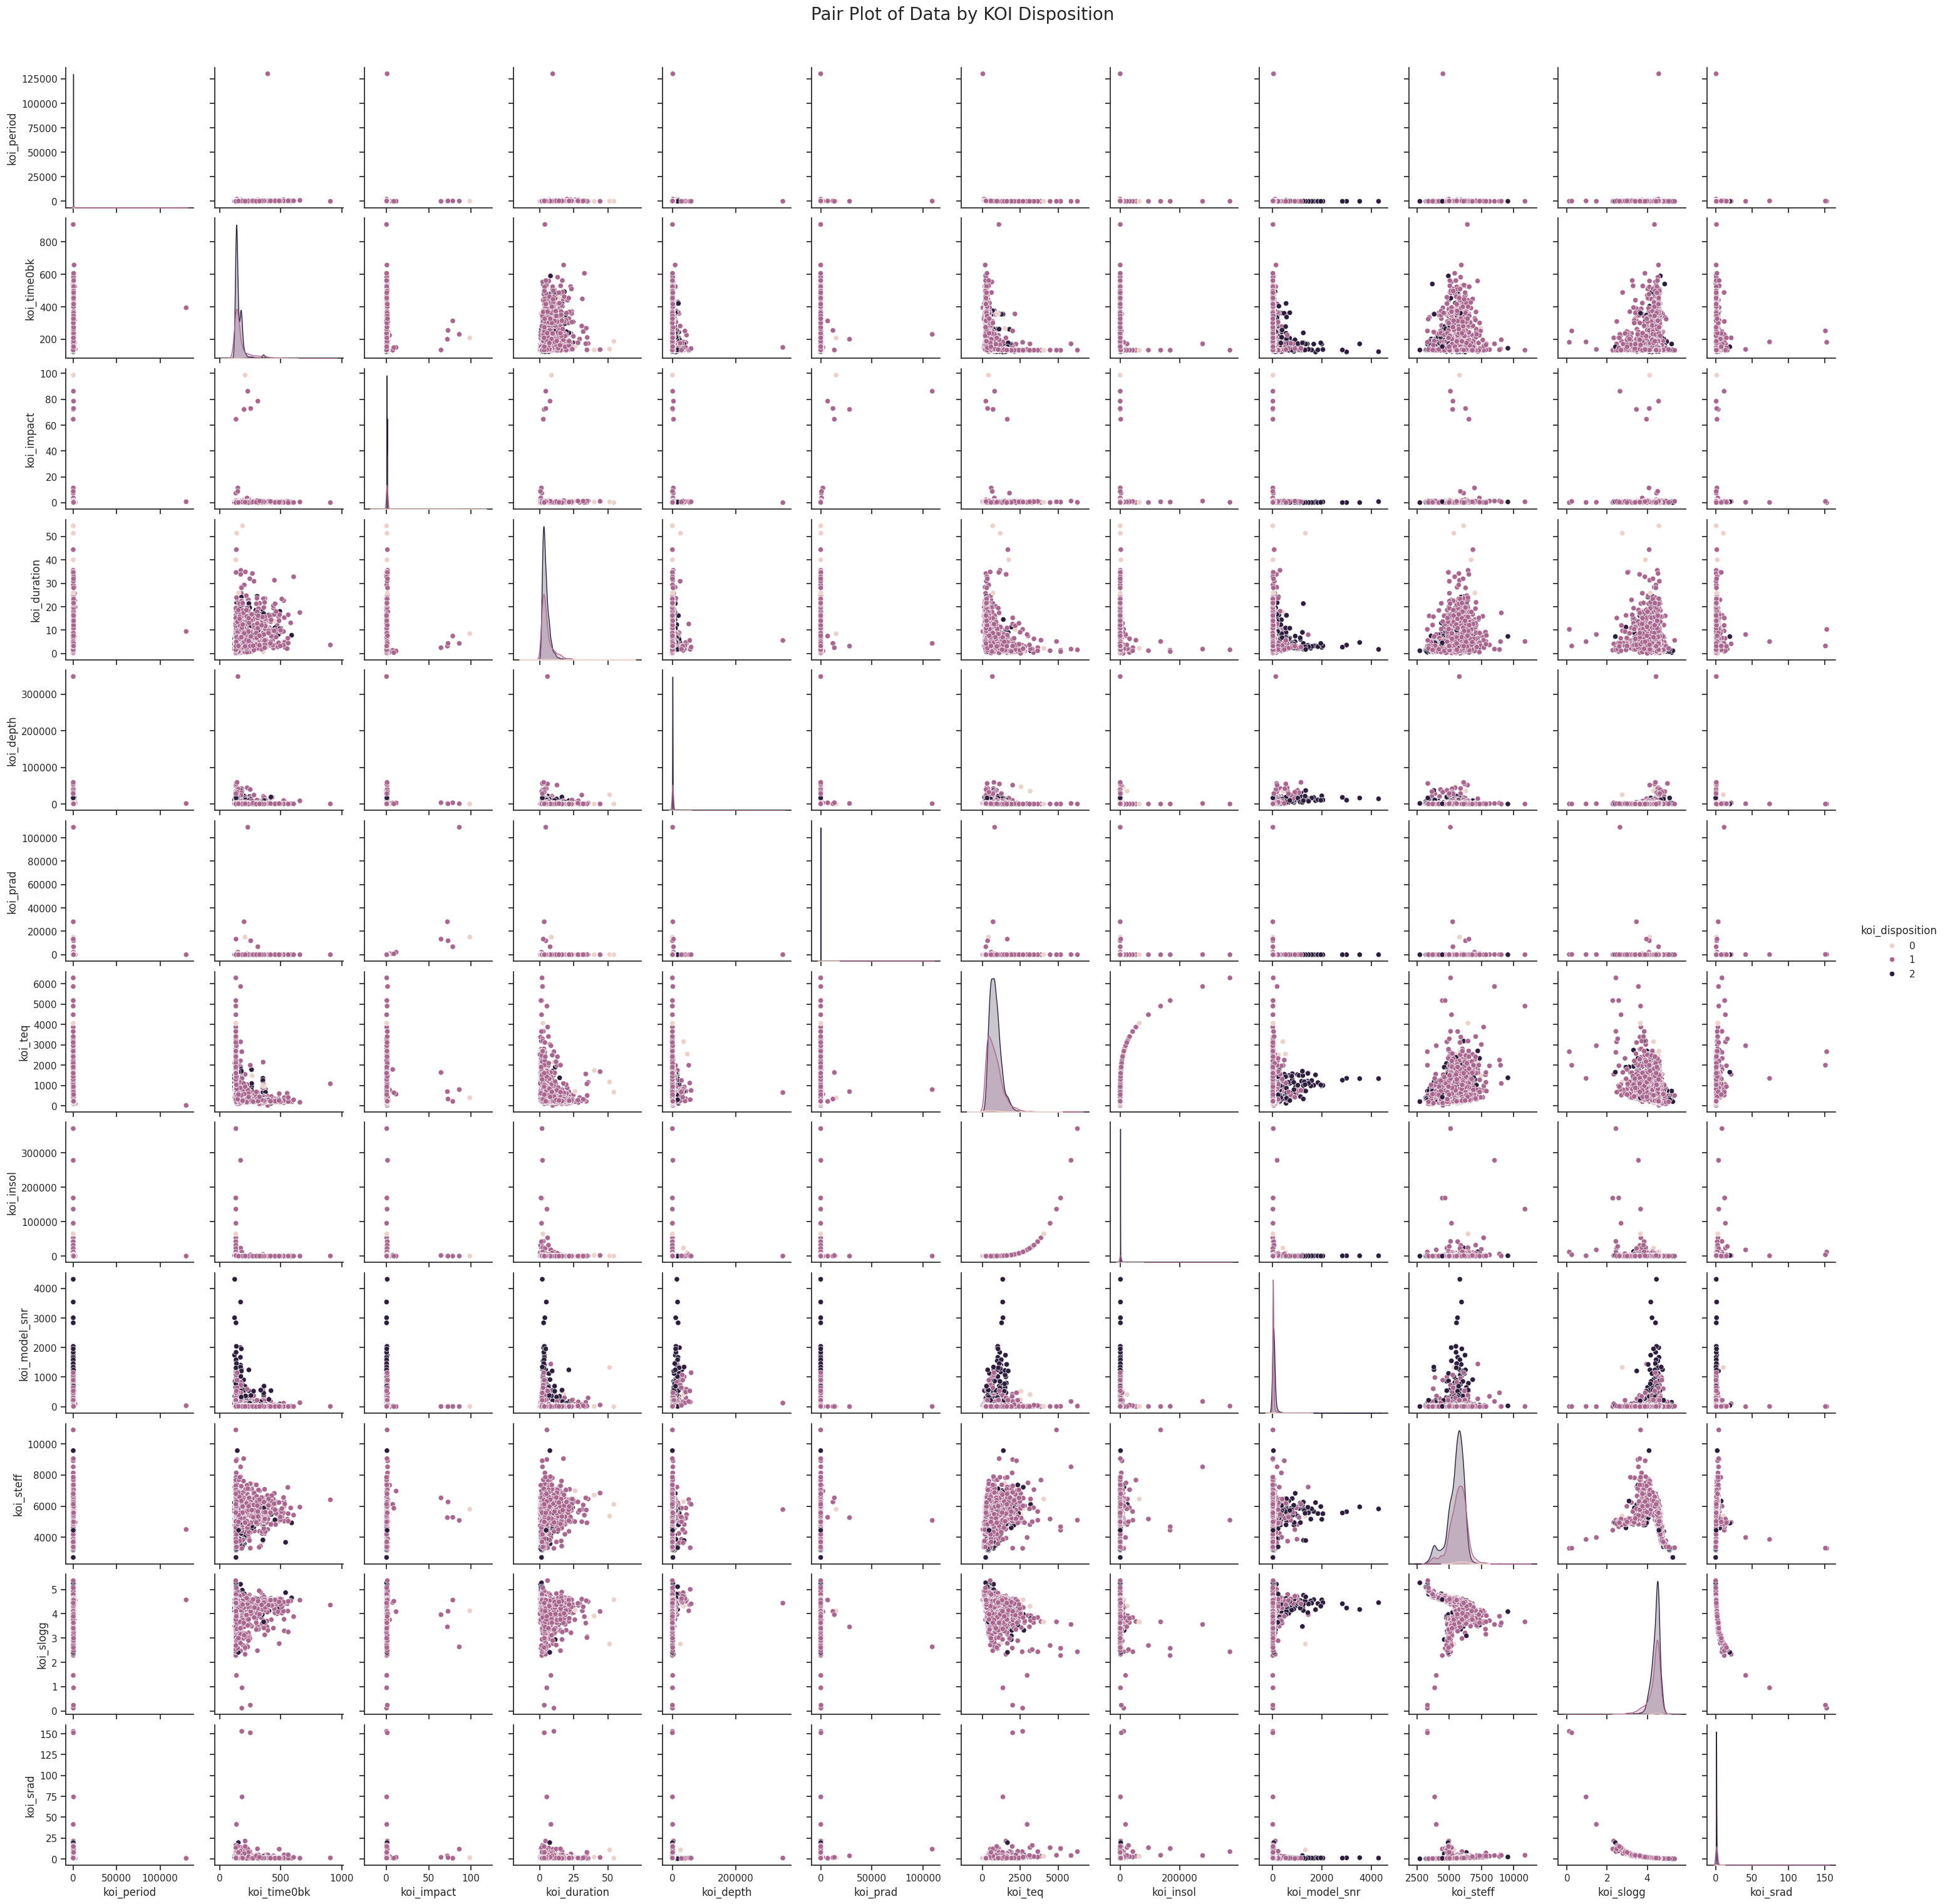

In [64]:


# Create the pair plot
pairplot_fig = sns.pairplot(df_filtered, hue='koi_disposition')

# Add a title to the pair plot
pairplot_fig.fig.suptitle('Pair Plot of Data by KOI Disposition', size=20, y=1.02)

# Show the plot
plt.show()

### PCA:
When conducting PCA, it is essential to determine the number of principal components to retain by examining the variance that each component explains. Our assessment concludes that retaining eight components is optimal for our analysis, as they cumulatively account for 95% of the variance in our data.

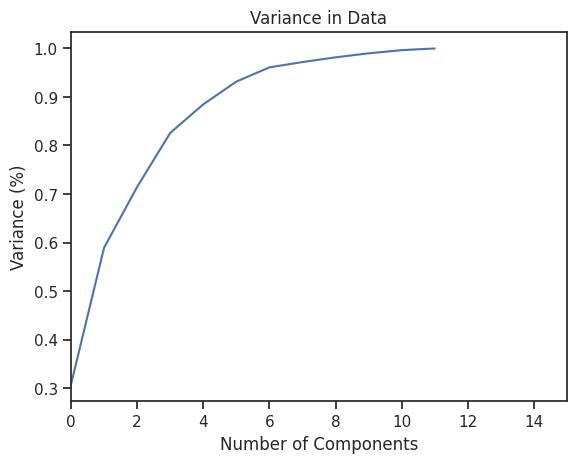

[0.30753742 0.58932737 0.71461568 0.82590314 0.88476204 0.93170429
 0.96097131 0.97197658 0.98165511 0.98997679 0.9964989  1.        ]


In [65]:
# remove the koi_disposition column since it is the target
data = df_filtered.iloc[:, 1:].values  
# Standardizing the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
# Applying PCA
pca = PCA().fit(data_scaled)
# plot the cumulative sum of explained variance ratio
plt.figure()
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.xlim((0, 15))
plt.title('Variance in Data')
plt.show()
# print the cumulative sum of explained variance ratio
print(np.cumsum(pca.explained_variance_ratio_))

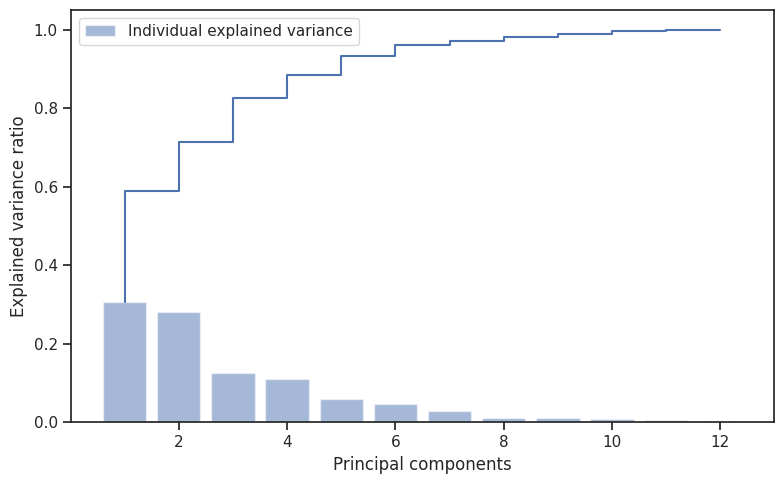

In [66]:
# draw the scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [67]:
# select the number of components
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(data_scaled)

# Getting the eigenvalues and explained variance ratios
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Creating a DataFrame to display the eigenvalues with their explained variance
eigenvalues_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(n_components)]).T

display(eigenvalues_df)

# Get eigenvectors
eigenvectors = pca.components_

eig_data = pd.DataFrame(data)
# Create DataFrame with eigenvectors
# Use the original DataFrame's columns (minus 'koi_disposition') for indexing
eigenvector_df = pd.DataFrame(eigenvectors.T, columns=[f'PC{i+1}' for i in range(n_components)], index=df_filtered.iloc[:, 1:].columns)

display(eigenvector_df)

,PC1,PC2,PC3,PC4,PC5,PC6
Eigenvalue,0.010079,0.009235,0.004106,0.003647,0.001929,0.001538
Proportion of Variance,0.307537,0.281790,0.125288,0.111287,0.058859,0.046942
Cumulative Proportion,0.307537,0.589327,0.714616,0.825903,0.884762,0.931704


,PC1,PC2,PC3,PC4,PC5,PC6
koi_period,-0.013402,0.000490,0.009178,0.000423,-0.003120,-0.003203
koi_time0bk,-0.638377,0.167163,0.672608,-0.313316,-0.098627,-0.044559
koi_impact,-0.004430,0.009023,0.020351,0.011944,0.089712,0.034506
koi_duration,-0.459048,0.368631,-0.340506,0.566270,-0.429845,-0.164430
koi_depth,-0.009122,-0.006806,0.004690,-0.000367,-0.067864,0.157804
koi_prad,-0.001072,0.004043,0.014417,0.013707,0.047387,0.020268
koi_teq,0.598988,0.264529,0.441932,0.093043,-0.527835,-0.219285
koi_insol,0.061706,0.044207,0.109276,0.048249,-0.131766,-0.083082
koi_model_snr,0.009714,0.008903,0.018235,0.007524,-0.359963,0.916353
koi_steff,0.097310,0.771078,-0.321663,-0.523090,0.104837,0.043961


Using 6 PCA components we can explain 93.17% of variance in our data. 

The first two components (PC1 and PC2) differentiate between the thermal characteristics of exoplanets and their stellar hosts, with PC1 closely associated with the equilibrium temperature (koi_teq), indicating its strong influence by the thermal properties of exoplanets and their transit features. PC2, on the other hand, is significantly correlated with stellar effective temperature (koi_steff), pointing towards its role in capturing variations in the thermal properties of stars, especially highlighting the inverse relationship between stellar temperature and surface gravity.

Further analysis from PC3 to PC6 reveals intricate details of the dataset: PC3's strong positive correlation with koi_time0bk signifies its emphasis on transit timing, while PC4, with its positive correlation to koi_duration, suggests its significance in representing the duration of these transits, associating longer durations with specific stellar characteristics. PC5, through its negative relationship with koi_teq, underscores variations in cooler temperatures across the dataset. Notably, PC6 stands out for its strong positive correlation with koi_model_snr (Signal to Noise Ratio), underlining the component's critical role in distinguishing the quality of exoplanet detection signals.

### Create a DataFrame with Principal Components

In [68]:

# transform the data
reduced_data = pca.transform(data_scaled)
# create a new DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
display(reduced_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.005882,-0.030319,0.009709,-0.023760,0.005410,-0.002483
1,-0.034217,-0.036324,-0.031524,-0.009629,0.024916,0.003715
2,-0.000252,-0.012288,-0.009338,-0.073337,0.019146,0.018802
3,0.082167,0.043671,0.041690,-0.062222,-0.025688,-0.014701
4,0.002281,0.036930,-0.021119,-0.045850,-0.007977,0.000581


### PCA Correlation Analysis

In [69]:
# add koi_disposition to the reduced_df
koi_reduced_df = reduced_df.copy()
koi_reduced_df['koi_disposition'] = df_filtered['koi_disposition'].values

# Building a correlation matrix
corr = reduced_df.corr()
display(corr)

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.000000e+00,-2.160952e-16,5.649359e-16,-7.974460e-16,4.596321e-16,3.843184e-16
PC2,-2.160952e-16,1.000000e+00,8.238859e-17,-7.659299e-17,-5.407046e-16,6.152900e-17
PC3,5.649359e-16,8.238859e-17,1.000000e+00,-6.860199e-17,7.986945e-16,-3.099008e-16
PC4,-7.974460e-16,-7.659299e-17,-6.860199e-17,1.000000e+00,3.676965e-16,-2.038163e-16
PC5,4.596321e-16,-5.407046e-16,7.986945e-16,3.676965e-16,1.000000e+00,-5.542277e-16
PC6,3.843184e-16,6.152900e-17,-3.099008e-16,-2.038163e-16,-5.542277e-16,1.000000e+00


This correlation matrix shows little to no correlation between the principal components. This is a good sign that the principal components are independent of each other. This is important because the principal components are used to reduce the dimensionality of the data while preserving the variance in the data. If the principal components were highly correlated, then the dimensionality reduction would not be as effective.

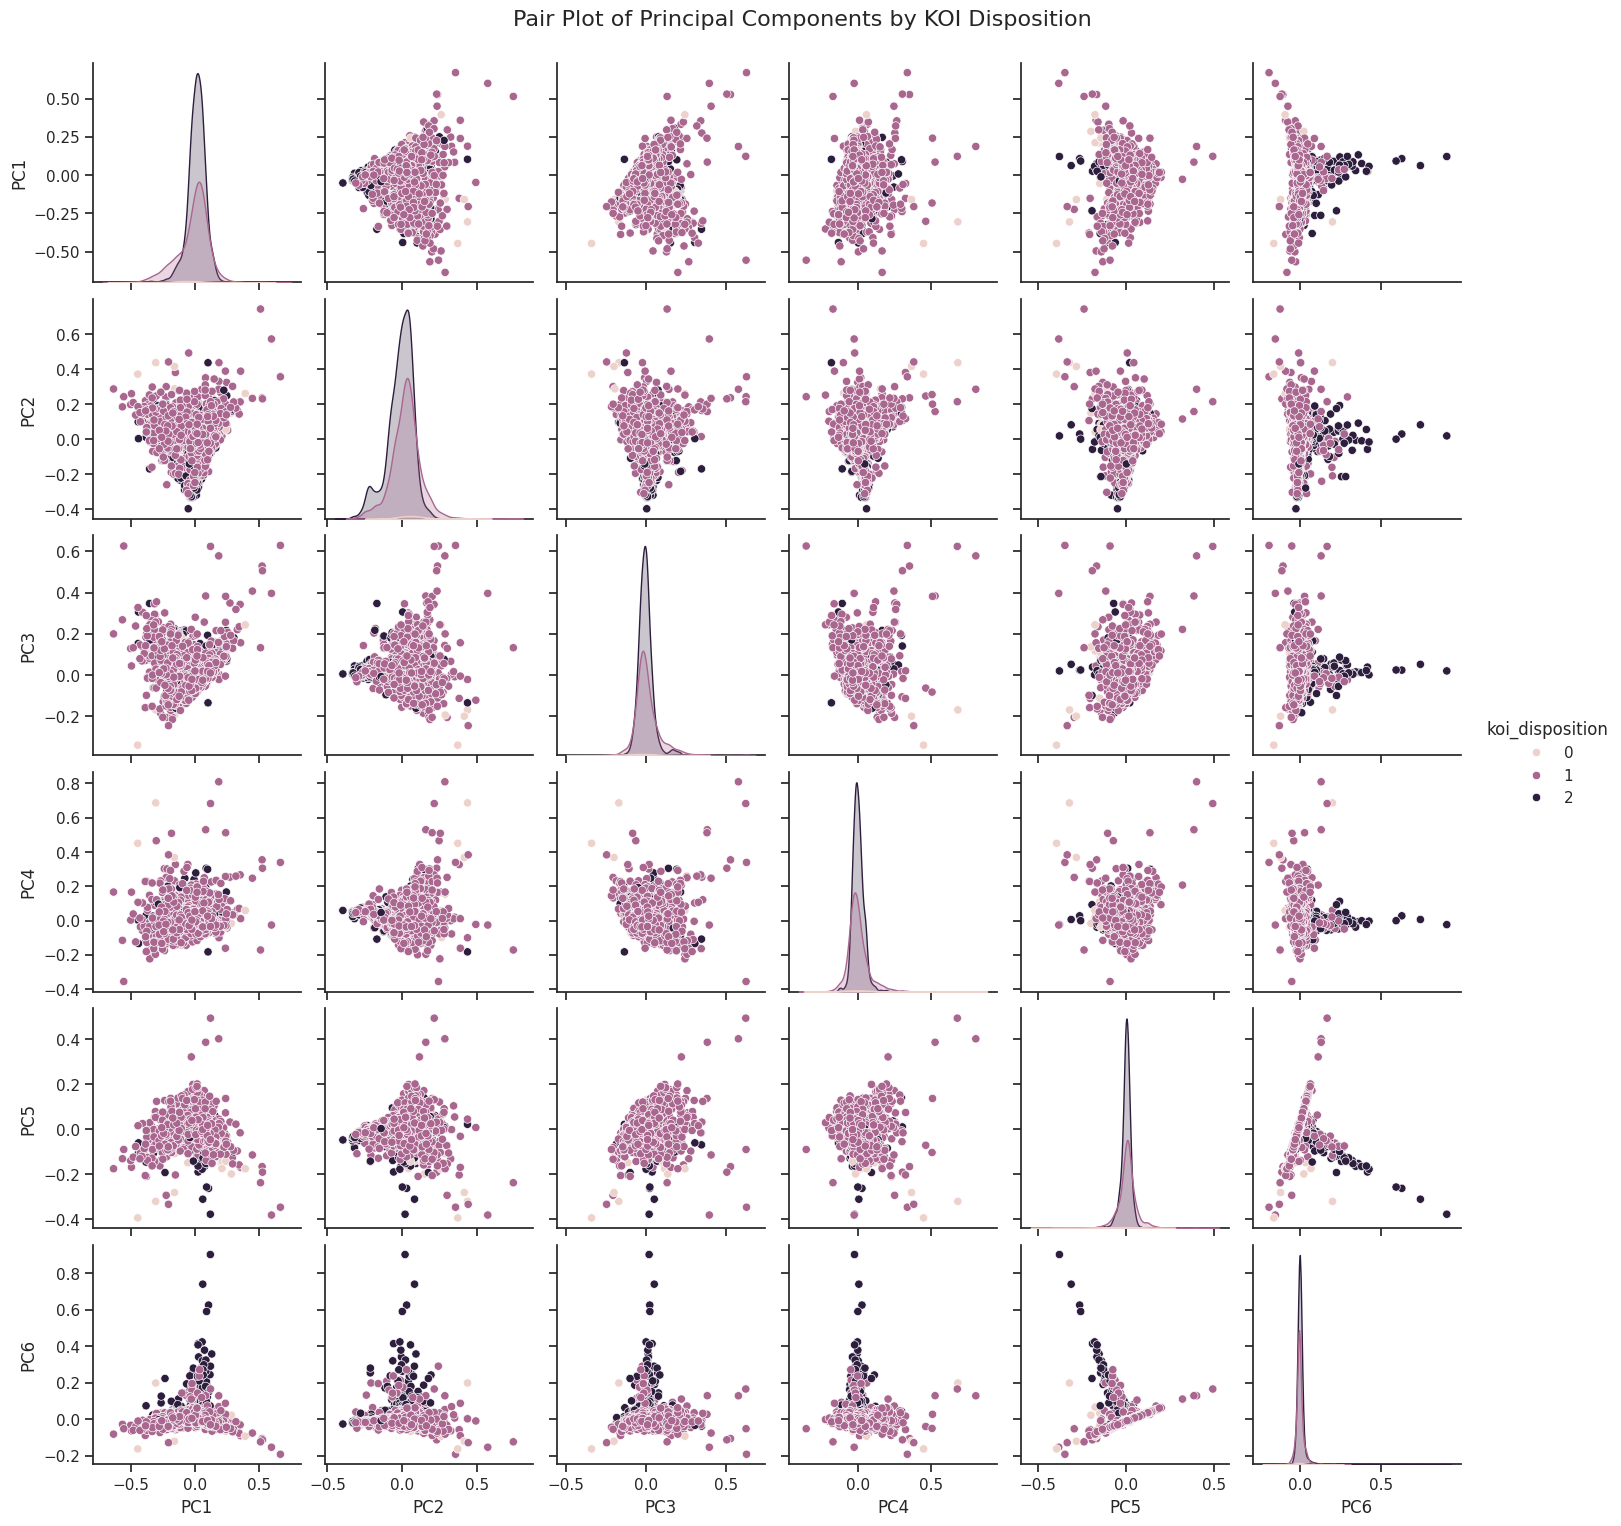

In [70]:
# Plotting the pair plot of the principal components
# Setting the aesthetic style of the plots
sns.set(style="ticks")

pairplot_df = koi_reduced_df

# Generating the pair plot
pairplot = sns.pairplot(pairplot_df, hue="koi_disposition")
pairplot.fig.suptitle('Pair Plot of Principal Components by KOI Disposition', fontsize=16, y=1.02)
plt.show()

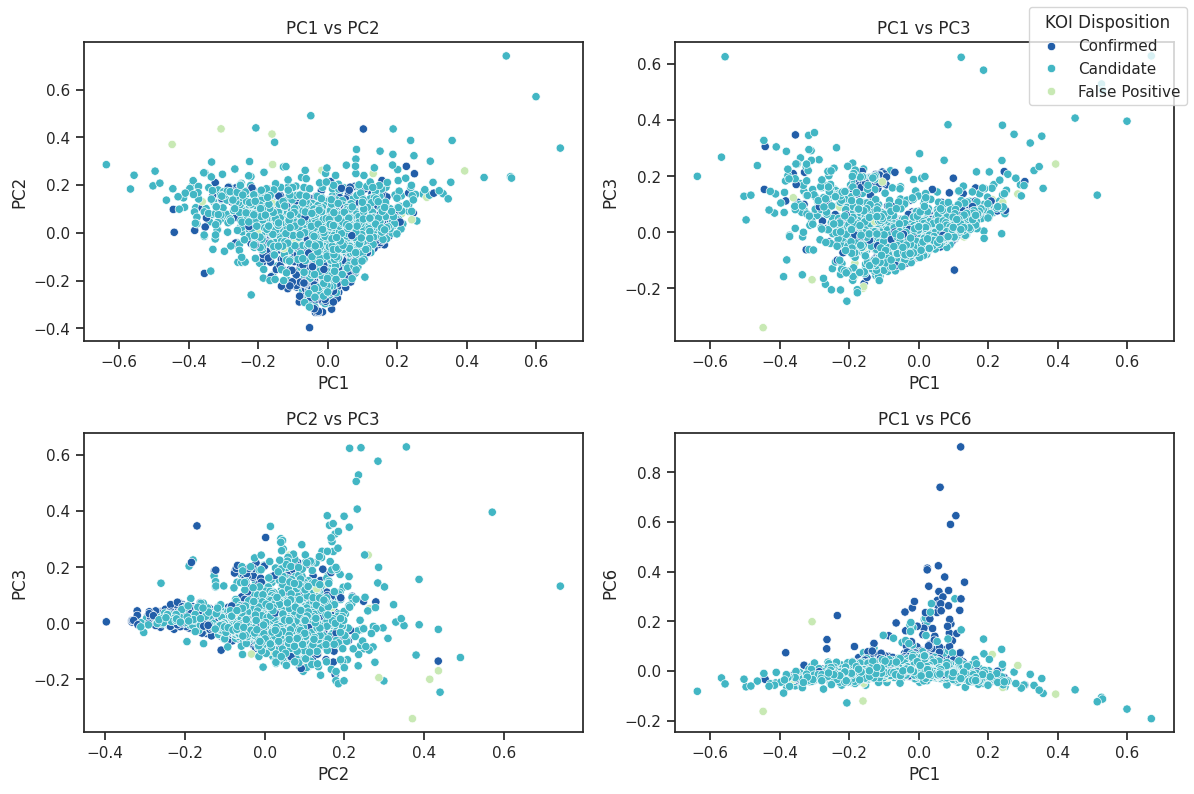

In [77]:
# Create a figure and a set of subplots for individual scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Mapping for koi_disposition to improve readability in plots
disposition_mapping = {0: "False Positive", 1: "Candidate", 2: "Confirmed"}
pairplot_df['koi_disposition_mapped'] = pairplot_df['koi_disposition'].map(disposition_mapping)

# Plotting individual scatter plots
sns.scatterplot(ax=axes[0,0], data=pairplot_df, x='PC1', y='PC2', hue='koi_disposition_mapped', palette='YlGnBu_r')
axes[0, 0].set_title('PC1 vs PC2')

sns.scatterplot(ax=axes[0,1], data=pairplot_df, x='PC1', y='PC3', hue='koi_disposition_mapped', palette='YlGnBu_r')
axes[0, 1].set_title('PC1 vs PC3')

sns.scatterplot(ax=axes[1,0], data=pairplot_df, x='PC2', y='PC3', hue='koi_disposition_mapped', palette='YlGnBu_r')
axes[1, 0].set_title('PC2 vs PC3')

sns.scatterplot(ax=axes[1,1], data=pairplot_df, x='PC1', y='PC6', hue='koi_disposition_mapped', palette='YlGnBu_r')
axes[1, 1].set_title('PC1 vs PC6')

# Adjusting the legend
# Collecting handles and labels for the legend
handles, labels = axes[0, 0].get_legend_handles_labels()
# Placing one legend at the best location
fig.legend(handles, labels, loc='upper right', title='KOI Disposition')
# Removing redundant legends from subplots
for ax in axes.flat:
    ax.get_legend().remove()

# Optimize layout
plt.tight_layout()
plt.show()

### UMAP:
To better visualize the data, we have reduced it to two dimensions.

In [72]:
# import the libraries
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from dataclasses import replace
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN

### Visualization:

/home/codespace/.python/current/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[ 4.922204   5.906467 ]
 [ 3.8160524  7.9824004]
 [ 3.6281838  4.6545954]
 ...
 [ 0.7159658  2.8502052]
 [-2.3700035 12.21117  ]
 [-4.1143217  7.9606786]]
(4647, 2)


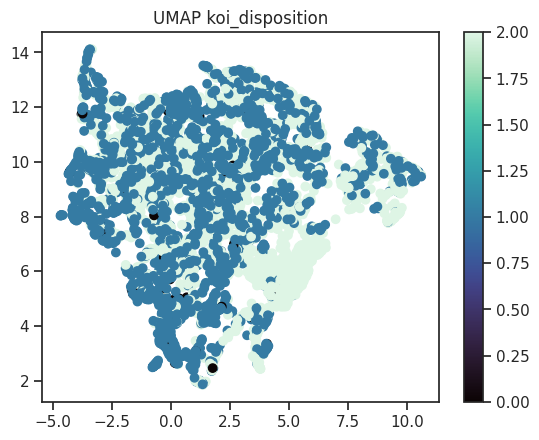

In [73]:
# UMAP
# remove the koi_disposition column since it is the target
test = df_filtered.iloc[:, 1:].values
# Standardizing the features
reducer = umap.UMAP(random_state=1)
scaled_test_data = StandardScaler().fit_transform(test)
# Applying UMAP
# create a new DataFrame
embedding = reducer.fit_transform(scaled_test_data)
print(embedding)
print(embedding.shape)
# plot the UMAP 
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=df_filtered.koi_disposition, 
    cmap='mako'
)

plt.colorbar()
plt.title('UMAP koi_disposition')
plt.show()

Text(0.5, 1.0, 'UMAP koi_impact')

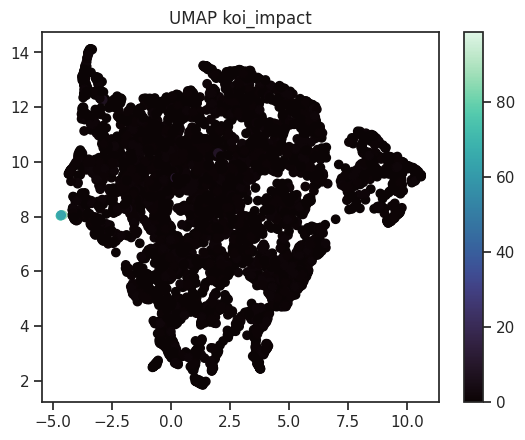

In [74]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_impact,cmap='mako')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_impact')

Text(0.5, 1.0, 'UMAP koi_teq')

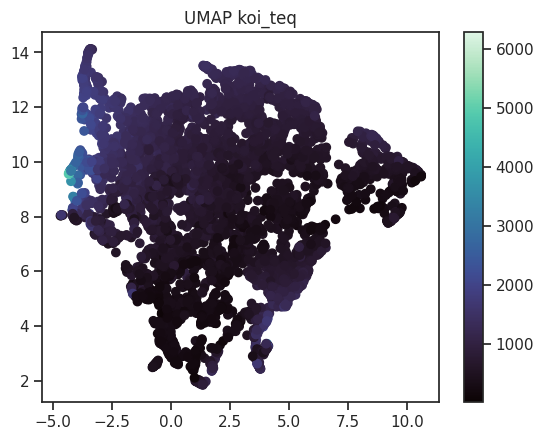

In [75]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_teq,cmap='mako')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_teq')

Text(0.5, 1.0, 'UMAP koi_slogg')

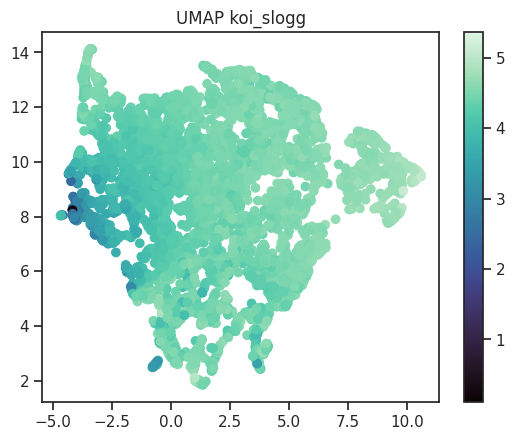

In [76]:
# 2D plot
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],c=df_filtered.koi_slogg,cmap='mako')

plt.gca()
plt.colorbar()
plt.title('UMAP koi_slogg')